### Heart Disease Prediction
#### I Made Adhi Aryadi - 140310210040

Heart disease is one of the leading causes of death worldwide, and predicting its occurrence early can significantly improve patient outcomes. Traditional methods of diagnosing heart disease involve clinical examinations, tests, and assessments by medical professionals. However, advancements in machine learning (ML) have provided new opportunities to enhance heart disease prediction by analyzing large datasets, which include patient medical histories, lab results, and other health indicators. This approach leverages the power of data to identify patterns and relationships that are often difficult to detect using traditional methods.

In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from scipy.stats import boxcox
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

## 1. Assesing Data

In [137]:
df = pd.read_csv('./heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


From this dataset there a 303 sample with 13 variable and 1 target

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [139]:
null = df.isnull().sum() 
print("Number of missing data on each column :")
print(null)

Number of missing data on each column :
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [140]:
df.duplicated().sum()
print("duplicated data: ",df.duplicated().sum())

duplicated data:  1


From the analysis while gathering the data, the data was quite clean, but there a duplicated data, so the first step are clean the duplicated data

In [141]:
df = df.drop_duplicates()
print("duplicated data: ",df.duplicated().sum())

duplicated data:  0


## 2. Explore Data Analysis

Exploratory Data Analysis (EDA) is the process of examining and visualizing data to uncover patterns, spot anomalies, test hypotheses, and check assumptions, with the goal of understanding its structure and guiding further analysis. It involves summary statistics, visualizations like histograms and scatter plots, and handling missing data.

#### Statistical Summary

In [142]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,302.0,54.420530,9.047970,29.0,48.00,55.5,61.00,77.0
sex,302.0,0.682119,0.466426,0.0,0.00,1.0,1.00,1.0
cp,302.0,0.963576,1.032044,0.0,0.00,1.0,2.00,3.0
trestbps,302.0,131.602649,17.563394,94.0,120.00,130.0,140.00,200.0
chol,302.0,246.500000,51.753489,126.0,211.00,240.5,274.75,564.0
fbs,302.0,0.149007,0.356686,0.0,0.00,0.0,0.00,1.0
restecg,302.0,0.526490,0.526027,0.0,0.00,1.0,1.00,2.0
thalach,302.0,149.569536,22.903527,71.0,133.25,152.5,166.00,202.0
exang,302.0,0.327815,0.470196,0.0,0.00,0.0,1.00,1.0
oldpeak,302.0,1.043046,1.161452,0.0,0.00,0.8,1.60,6.2


Data Information
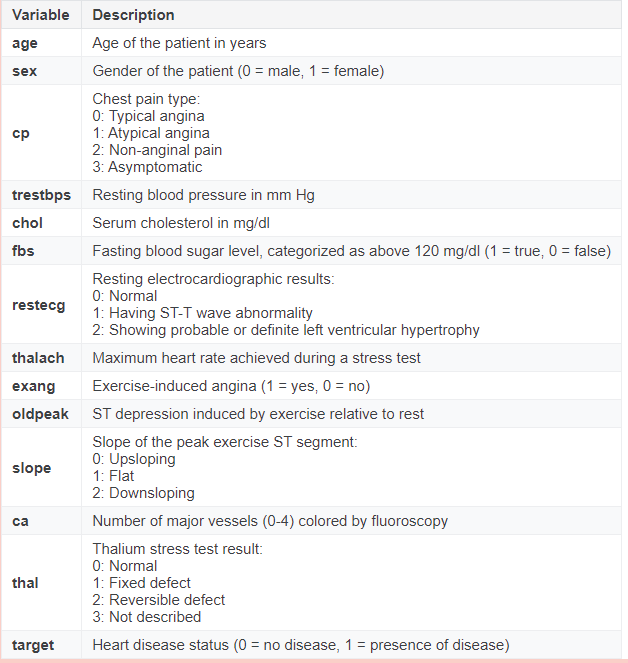

#### split data based on Continous or Categorical Feature

In [143]:
# Define the continuous features
continuous_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Identify the features to be converted to object data type
features_to_convert = [feature for feature in df.columns if feature not in continuous_features]

# Convert the identified features to object data type
df[features_to_convert] = df[features_to_convert].astype('object')

df.describe(include='object')

,sex,cp,fbs,restecg,exang,slope,ca,thal,target
count,302,302,302,302,302,302,302,302,302
unique,2,4,2,3,2,3,5,4,2
top,1,0,0,1,0,2,0,2,1
freq,206,143,257,151,203,141,175,165,164


From this step we got the frequency isnt quite balance for each feature, furthermore it can affect to the model precission.

#### Categorical Data Analysis

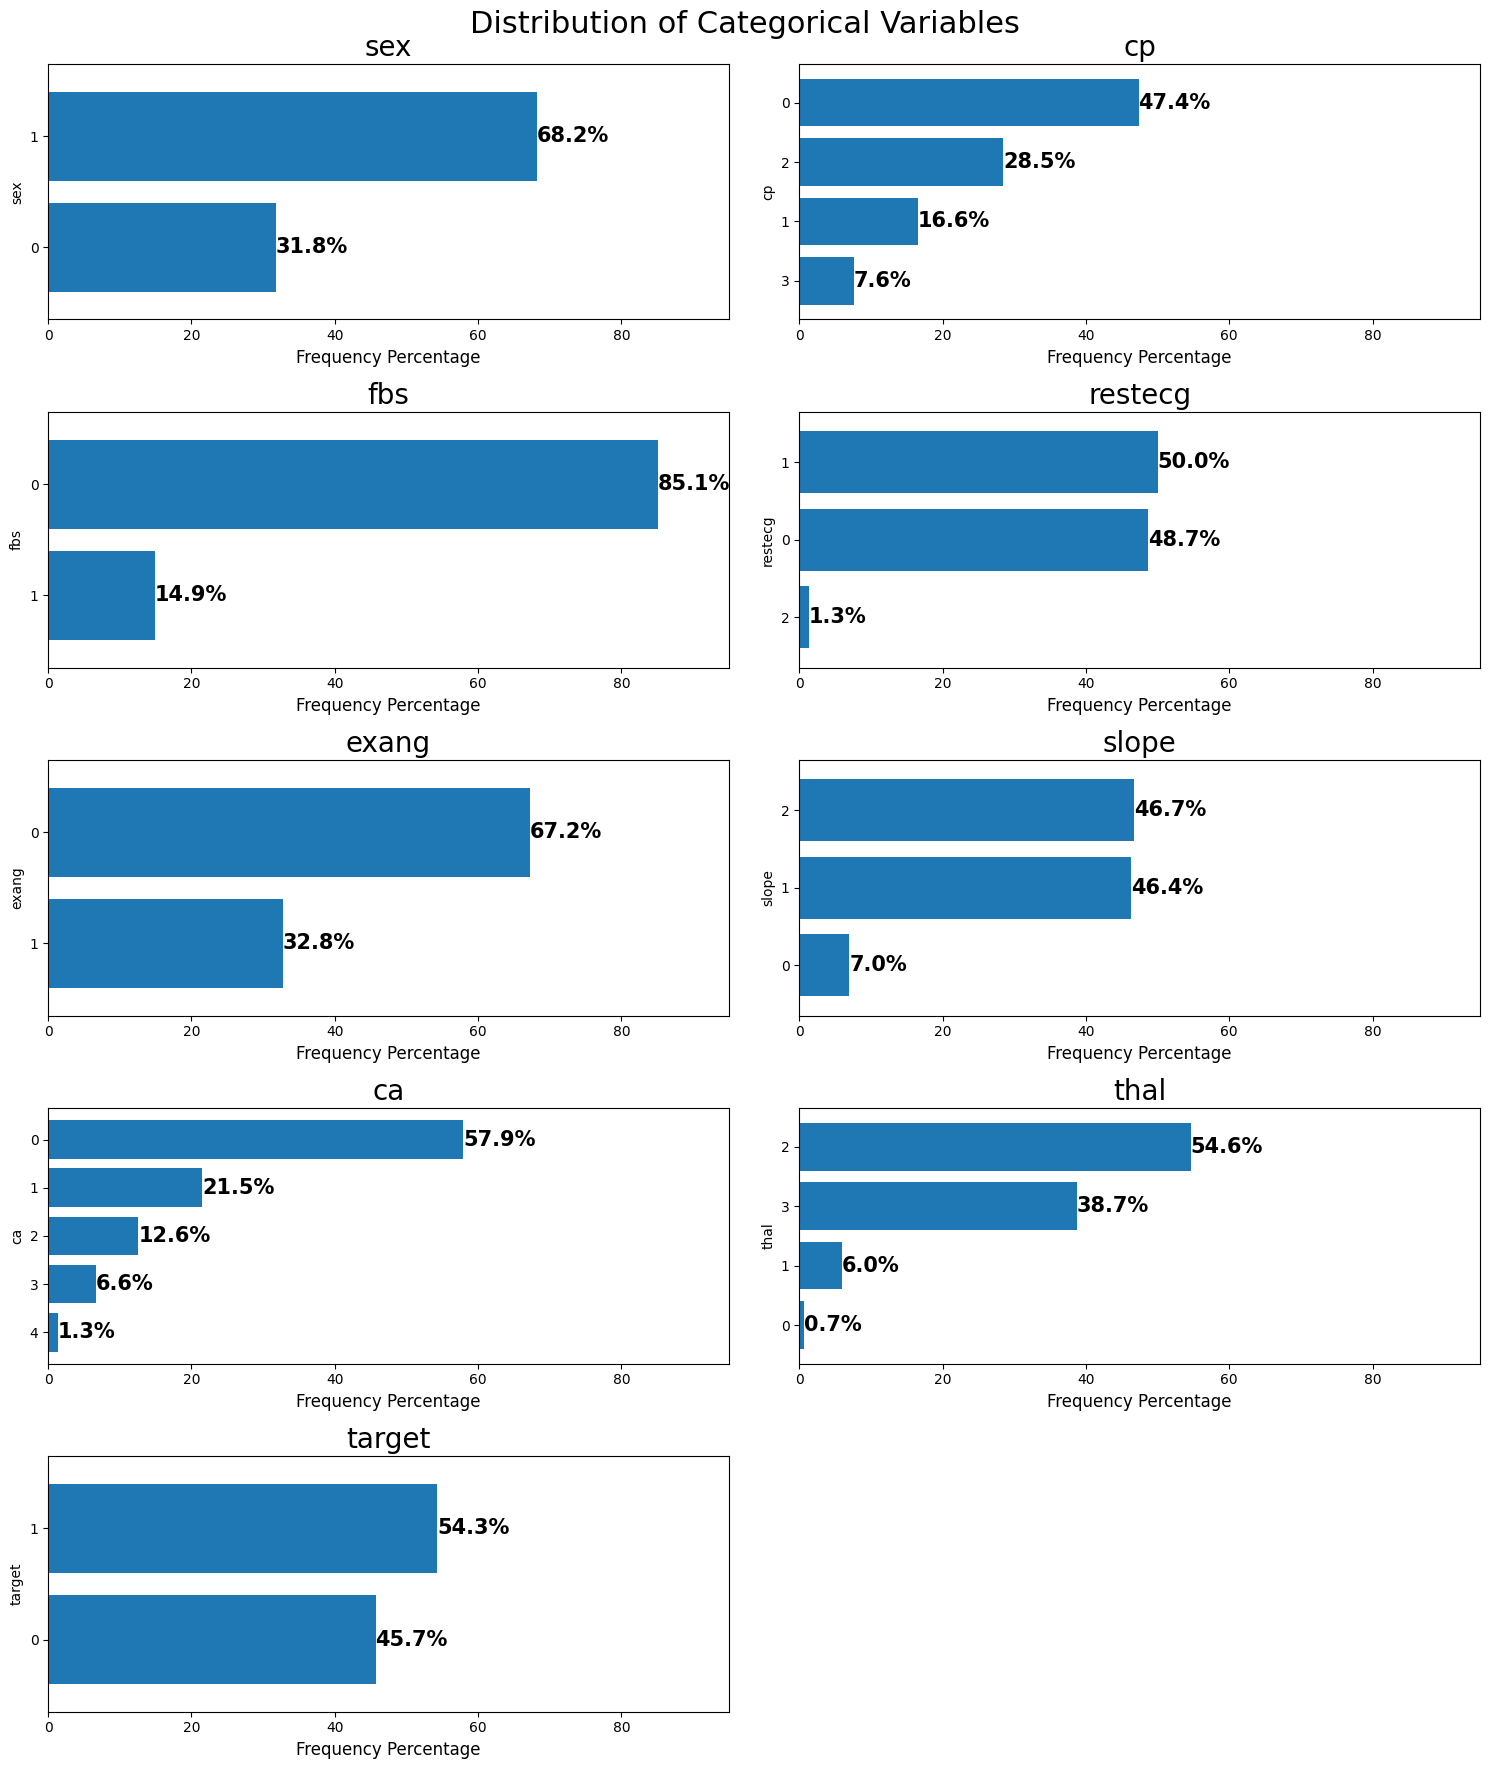

In [144]:
# Set up the subplot for a 4x2 layout
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(15, 18))

# Loop to plot bar charts for each categorical feature in the 4x2 layout
for i, col in enumerate(features_to_convert):
    row = i // 2
    col_idx = i % 2
    
    # Calculate frequency percentages
    value_counts = df[col].value_counts(normalize=True).mul(100).sort_values()
    
    # Plot bar chart
    value_counts.plot(kind='barh', ax=ax[row, col_idx], width=0.8)
    
    # Add frequency percentages to the bars
    for index, value in enumerate(value_counts):
        ax[row, col_idx].text(value, index, str(round(value, 1)) + '%', fontsize=15, weight='bold', va='center')
    
    ax[row, col_idx].set_xlim([0, 95])
    ax[row, col_idx].set_xlabel('Frequency Percentage', fontsize=12)
    ax[row, col_idx].set_title(f'{col}', fontsize=20)

# Turn off the last empty subplot if necessary
ax[4,1].axis('off')

# Add a main title and adjust layout
plt.suptitle('Distribution of Categorical Variables', fontsize=22)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()


- **Gender (sex):** The dataset is largely female, with women forming a significant majority.
- **Type of Chest Pain (cp):** There is a range of chest pain types among patients, with Type 0 (Typical angina) being the most common. Detailed distributions can be seen in the bar plots.
- **Fasting Blood Sugar (fbs):** Most patients have fasting blood sugar levels below 120 mg/dl, indicating high blood sugar is not prevalent in this dataset.
- **Resting Electrocardiographic Results (restecg):** Resting electrocardiographic outcomes vary, with certain types occurring more frequently than others, as shown in the plots.
- **Exercise-Induced Angina (exang):** The majority of patients do not experience exercise-induced angina, suggesting this symptom is relatively uncommon in the dataset.
- **Slope of the Peak Exercise ST Segment (slope):** Different slopes are observed in the peak exercise ST segment, with one type possibly more common, as indicated in the bar plots.
- **Number of Major Vessels Colored by Fluoroscopy (ca):** Most patients have fewer major vessels highlighted by fluoroscopy, with ‘0’ appearing most frequently.
- **Thalium Stress Test Result (thal):** There is a range of thalium stress test results, with one type more common than the others, as shown in the bar plots.
- **Presence of Heart Disease (target):** The dataset is almost balanced for heart disease presence, with about 54.5% of patients affected and 45.5% not affected.

#### Continous Data Analysis

In [ ]:
fig, ax = plt.subplots(len(continuous_features), 2, figsize=(15,15), gridspec_kw={'width_ratios': [1, 2]})

# Loop through each continuous feature to create barplots and kde plots
for i, col in enumerate(continuous_features):
    # Barplot showing the mean value of the feature for each target category
    graph = sns.barplot(data=df, x="target", y=col, ax=ax[i,0])
    
    # KDE plot showing the distribution of the feature for each target category
    sns.kdeplot(data=df[df["target"]==0], x=col, fill=True, linewidth=2, ax=ax[i,1], label='0')
    sns.kdeplot(data=df[df["target"]==1], x=col, fill=True, linewidth=2, ax=ax[i,1], label='1')
    ax[i,1].set_yticks([])
    ax[i,1].legend(title='Heart Disease', loc='upper right')
    
    # Add mean values to the barplot
    for cont in graph.containers:
        graph.bar_label(cont, fmt='         %.3g')
        
# Set the title for the entire figure
plt.suptitle('Continuous Features vs Target Distribution', fontsize=22)
plt.tight_layout()                     
plt.show()

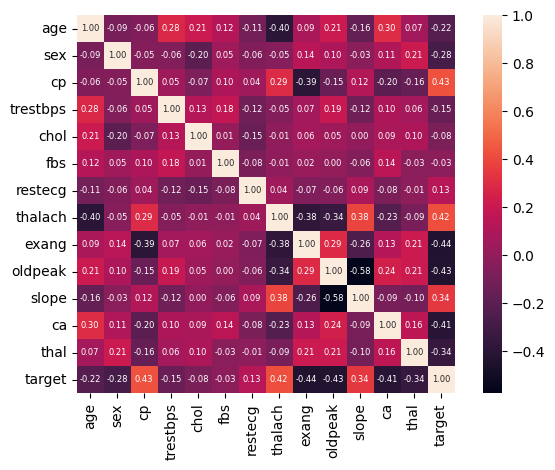

In [ ]:
cor=df.corr() #membuat nilai korelasi variabel a terhadap variabel b
sns.heatmap(cor, annot=True, fmt=".2f", cbar=True, square=True, 
            annot_kws={"size": 6}) #membuat heatmap
plt.tight_layout()
plt.show()

- **Age (age):** There is a slight age difference, with patients who have heart disease being slightly younger on average compared to those without. Patients without heart disease generally have a higher mean age.
- **Resting Blood Pressure (trestbps):** The KDE plot for resting blood pressure shows overlapping distributions for both categories, with nearly identical mean values, suggesting this feature has limited ability to distinguish between the two groups.
- **Serum Cholesterol (chol):** Cholesterol levels are similar across both categories, though patients with heart disease have a marginally lower mean cholesterol level than those without.
- **Maximum Heart Rate Achieved (thalach):** There is a notable distinction in maximum heart rate achieved, with patients who have heart disease generally reaching a higher heart rate during stress tests than those without.
- **ST Depression (oldpeak):** ST depression from exercise relative to rest is lower for patients with heart disease, with their distribution peaking near zero. In contrast, patients without heart disease have a broader spread in their ST depression values.

#### Prepare the Data

In [ ]:
def mean(x): # np.mean(X, axis = 0)  
    return sum(x)/len(x)  

def std(x): # np.std(X, axis = 0)
    return (sum((i - mean(x))**2 for i in x)/len(x))**0.5

def Standardize_data(X):
    return (X - mean(X))/std(X)
X=df[continuous_features].to_numpy()#define the variable to be PCA
Y=df['target'].to_numpy()

X_std=Standardize_data(X)
num_samples, num_var=X.shape

print("Data need to processed in reductional dimenssion")
print("number of samples:", num_samples)
print("number of variable: ",num_var)
print("the variable are: ",", ".join(continuous_features))


Data need to processed in reductional dimenssion
number of samples: 302
number of variable:  5
the variable are:  age, trestbps, chol, thalach, oldpeak


In this step data would be processed using Partial Component Analysis. PCA only work for continous data, so in this step only use continous data

In [ ]:
def covariance(x): 
    return (x.T @ x)/(x.shape[0]-1)

cov_mat = covariance(X_std)

In [ ]:
from numpy.linalg import eig

# Eigendecomposition of covariance matrix
eig_vals, eig_vecs = eig(cov_mat) 

# Adjusting the eigenvectors (loadings) that are largest in absolute value to be positive
max_abs_idx = np.argmax(np.abs(eig_vecs), axis=0)
signs = np.sign(eig_vecs[max_abs_idx, range(eig_vecs.shape[0])])
eig_vecs = eig_vecs*signs[np.newaxis,:]
eig_vecs = eig_vecs.T

print('Eigenvalues \n', eig_vals)
print('Eigenvectors \n', eig_vecs)

Eigenvalues 
 [1.80682802 0.47646313 1.08561373 0.76576011 0.8819463 ]
Eigenvectors 
 [[ 0.56695354  0.38218796  0.23917901 -0.50489682  0.46943439]
 [ 0.60163167 -0.34095117 -0.17977685  0.62487497  0.31464772]
 [ 0.10907856  0.41982164  0.69572916  0.48076953 -0.31092323]
 [-0.52125786 -0.14607782  0.38264067  0.16446499  0.73040325]
 [-0.1816456   0.73491205 -0.52916986  0.31051957  0.22464641]]


In [ ]:
# We first make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[i,:]) for i in range(len(eig_vals))]

# Then, we sort the tuples from the highest to the lowest based on eigenvalues magnitude
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# For further usage
eig_vals_sorted = np.array([x[0] for x in eig_pairs])
eig_vecs_sorted = np.array([x[1] for x in eig_pairs])

print(eig_pairs)

[(1.806828024575506, array([ 0.56695354,  0.38218796,  0.23917901, -0.50489682,  0.46943439])), (1.0856137293266375, array([ 0.10907856,  0.41982164,  0.69572916,  0.48076953, -0.31092323])), (0.8819463000945718, array([-0.1816456 ,  0.73491205, -0.52916986,  0.31051957,  0.22464641])), (0.7657601113520128, array([-0.52125786, -0.14607782,  0.38264067,  0.16446499,  0.73040325])), (0.4764631303323303, array([ 0.60163167, -0.34095117, -0.17977685,  0.62487497,  0.31464772]))]


In [ ]:
# Select top k eigenvectors
k = num_var
W = eig_vecs_sorted[:k, :] # Projection matrix

print(W.shape)

(5, 5)


Explained variance: [36.02 21.64 17.58 15.26  9.5 ]
Cumulative explained variance: [ 36.02  57.66  75.24  90.5  100.  ]


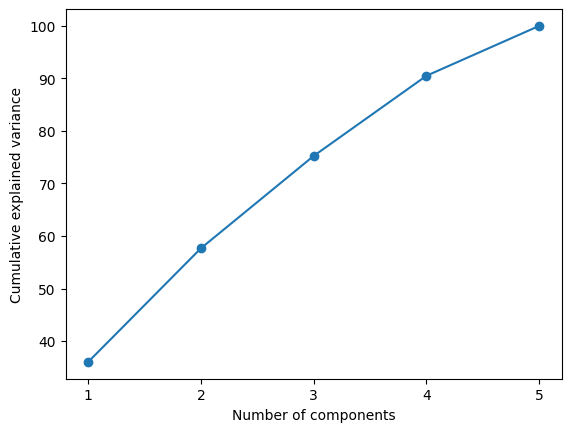

In [ ]:
eig_vals_total = sum(eig_vals)
explained_variance = [(i / eig_vals_total)*100 for i in eig_vals_sorted]
explained_variance = np.round(explained_variance, 2)
cum_explained_variance = np.cumsum(explained_variance)

print('Explained variance: {}'.format(explained_variance))
print('Cumulative explained variance: {}'.format(cum_explained_variance))

plt.plot(np.arange(1,num_var+1), cum_explained_variance, '-o')
plt.xticks(np.arange(1,num_var+1))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance');
plt.show()

(302, 5)


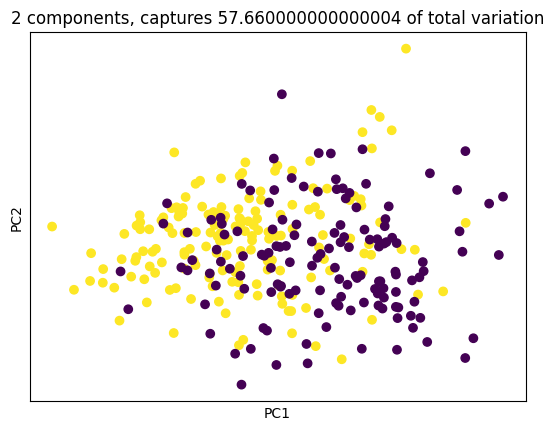

In [ ]:
X_proj = X_std.dot(W.T)

print(X_proj.shape)

plt.scatter(X_proj[:, 0], X_proj[:, 1], c = Y)
plt.xlabel('PC1'); plt.xticks([])
plt.ylabel('PC2'); plt.yticks([])
plt.title('2 components, captures {} of total variation'.format(cum_explained_variance[1]))
plt.show()

In [ ]:
class PCA:
    def __init__(self, n_components):
        """
        Initialize MyPCA with the number of principal components to keep.
        """
        self.n_components = n_components

    def fit(self, X):
        """
        Fit the model with X by computing the eigenvalues and eigenvectors 
        of the covariance matrix of standardized X.
        
        Parameters:
            X (numpy.ndarray): Input data of shape (n_samples, n_features)
        
        Returns:
            self: Fitted MyPCA instance
        """
        # Standardize data
        X = X.copy()
        self.mean = np.mean(X, axis=0)
        self.scale = np.std(X, axis=0)
        X_std = (X - self.mean) / self.scale
        
        # Eigendecomposition of covariance matrix
        cov_mat = np.cov(X_std.T)
        eig_vals, eig_vecs = np.linalg.eig(cov_mat)
        
        # Normalize eigenvectors to have unit length
        eig_vecs = eig_vecs / np.linalg.norm(eig_vecs, axis=0)
        
        # Ensure largest component of each eigenvector is positive
        max_abs_idx = np.argmax(np.abs(eig_vecs), axis=0)
        signs = np.sign(eig_vecs[max_abs_idx, range(eig_vecs.shape[0])])
        eig_vecs *= signs[np.newaxis, :]
        
        # Sort eigenvalues and eigenvectors in descending order
        eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:, i]) for i in range(len(eig_vals))]
        eig_pairs.sort(key=lambda x: x[0], reverse=True)
        
        # Store the sorted eigenvalues and eigenvectors
        self.explained_variance = np.array([x[0] for x in eig_pairs[:self.n_components]])
        self.components = np.array([x[1] for x in eig_pairs[:self.n_components]])
        
        # Calculate explained variance ratio
        total_variance = np.sum(eig_vals)
        self.explained_variance_ratio = self.explained_variance / total_variance
        self.cum_explained_variance = np.cumsum(self.explained_variance_ratio)

        return self

    def transform(self, X):
        """
        Project the data X onto the principal components.
        
        Parameters:
            X (numpy.ndarray): Input data of shape (n_samples, n_features)
        
        Returns:
            X_proj (numpy.ndarray): Transformed data of shape (n_samples, n_components)
        """
        X = X.copy()
        X_std = (X - self.mean) / self.scale
        X_proj = X_std.dot(self.components.T)
        
        return X_proj

# Example usage:
pca = PCA(n_components=2).fit(X)

print('Components:\n', pca.components)
print('Explained variance ratio:\n', pca.explained_variance_ratio)
print('Cumulative explained variance:\n', pca.cum_explained_variance)

X_proj = pca.transform(X)
print('Transformed data shape:', X_proj.shape)


Components:
 [[ 0.56695354  0.38218796  0.23917901 -0.50489682  0.46943439]
 [ 0.10907856  0.41982164  0.69572916  0.48076953 -0.31092323]]
Explained variance ratio:
 [0.36016903 0.2164038 ]
Cumulative explained variance:
 [0.36016903 0.57657283]
Transformed data shape: (302, 2)


#### Explained PCA: 
where X is the original data matrix,  𝜇  is the mean of each feature, and  σ is the standard deviation. This ensures each feature contributes equally to the analysis.<br>

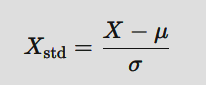 <br>
Covariance Matrix: The covariance matrix  C of X std(standardized data) measures feature relationships:<br>
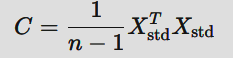<br><br>

Solve the eigenvalue equation for C: <br>
Cv=λv <br>
where 
𝑣 is an eigenvector (principal component) and 
𝜆 is the corresponding eigenvalue, representing the variance captured by that component. <br>
Sort eigenvalues 
𝜆 in descending order and take the top 
𝑘eigenvectors to form the principal components.<br> <br> <br>
Explained Variance: The explained variance for each principal component is: <br>
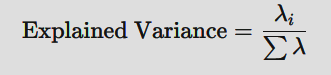<br>
The cumulative explained variance shows how much total variance is captured by the first 𝑘 components.<br> <br>
Projection: Project the original data 𝑋std onto the principal components: <br>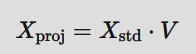

#### Set variable for input and output

All input feature in dataset will be used, because from EDA we do earlier show that each feature has correlation with the target.

In [ ]:
#prepare input data
X_pca=X_proj
X_new= (df[features_to_convert].astype(int)).to_numpy() #catagorical data
X_combined = np.hstack((X_pca, X_new)) 

num_samples, num_var=X_combined.shape

print("Data used as input")
print("number of samples:", num_samples)
print("number of variable: ",num_var)

#prepare output data
Y=df['target'].to_numpy()
Y = Y.reshape(-1, 1)  # Reshape to 302, 1

num_samples, num_var=Y.shape
print("\n Data used as output")
print("number of samples:", num_samples)
print("number of variable: ",num_var)

Data used as input
number of samples: 302
number of variable:  11
[[ 1.26738419 -0.08540677  1.         ...  0.          1.
   1.        ]
 [-0.9439359  -0.07342003  1.         ...  0.          2.
   1.        ]
 [-1.42478644 -0.39680939  0.         ...  0.          2.
   1.        ]
 ...
 [ 2.01830926 -1.07178387  1.         ...  2.          3.
   0.        ]
 [ 0.41917363 -2.33142513  1.         ...  1.          3.
   0.        ]
 [-0.88336674  0.64475125  0.         ...  1.          2.
   0.        ]]

 Data used as output
number of samples: 302
number of variable:  1


#### Model With PCA

In [ ]:

# Ensure target is numeric
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(df['target'])  # Convert categorical target to numeric labels

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_combined, Y, test_size=0.3, random_state=0)

# Initialize classifiers in pipeline form
models = {
    'Decision Tree': Pipeline([
        ('scaler', StandardScaler()),
        ('dt', DecisionTreeClassifier(random_state=0))
    ]),
    'Random Forest': Pipeline([
        ('scaler', StandardScaler()),
        ('rf', RandomForestClassifier(random_state=0))
    ]),
    'K-Nearest Neighbors': Pipeline([
        ('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())
    ]),
    'Naive Bayes': Pipeline([
        ('scaler', StandardScaler()),
        ('nb', GaussianNB())
    ])
}

# Function to extract relevant metrics from classification report
def extract_metrics(report):
    metrics = report['1']  # Extract metrics for class 1 (the target class you're interested in)
    return {
        'precision_1': metrics['precision'] * 100,
        'recall_1': metrics['recall'] * 100,
        'f1_1': metrics['f1-score'] * 100,
        'accuracy': report['accuracy'] * 100
    }

# Initialize a list to store evaluation results
evaluation_results = []

# Train and evaluate each classifier
for name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = model.predict(X_test)
    
    # Get the classification report
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Extract and store the metrics
    metrics = extract_metrics(report)
    metrics['Model'] = name  # Add model name to the metrics
    evaluation_results.append(metrics)

# Convert the evaluation results to a DataFrame
results_df = pd.DataFrame(evaluation_results)

# Reorder columns so that the model is on the left
results_df = results_df[['Model', 'precision_1', 'recall_1', 'f1_1', 'accuracy']]

# Display the sorted results by recall_1 (or another metric)
results_sorted = results_df.sort_values(by='recall_1', ascending=False).round(2)

# Display the final table
print("Model Performance Comparison (in %):")
print(results_sorted)


Model Performance Comparison (in %):
                 Model  precision_1  recall_1    f1_1  accuracy
0        Decision Tree       100.00     100.0  100.00     100.0
1        Random Forest       100.00     100.0  100.00     100.0
2  K-Nearest Neighbors        95.83     100.0   97.87      97.8
3          Naive Bayes       100.00     100.0  100.00     100.0


#### Model Without PCA


In [ ]:
X = df.drop(columns=['target']).to_numpy()
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

# Initialize classifiers in pipeline form
models = {
    'Decision Tree': Pipeline([
        ('scaler', StandardScaler()),
        ('dt', DecisionTreeClassifier(random_state=0))
    ]),
    'Random Forest': Pipeline([
        ('scaler', StandardScaler()),
        ('rf', RandomForestClassifier(random_state=0))
    ]),
    'K-Nearest Neighbors': Pipeline([
        ('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())
    ]),
    'Naive Bayes': Pipeline([
        ('scaler', StandardScaler()),
        ('nb', GaussianNB())
    ])
}

# Function to extract relevant metrics from classification report
def extract_metrics(report):
    metrics = report['1']  # Extract metrics for class 1 (the target class you're interested in)
    return {
        'precision_1': metrics['precision'] * 100,
        'recall_1': metrics['recall'] * 100,
        'f1_1': metrics['f1-score'] * 100,
        'accuracy': report['accuracy'] * 100
    }

# Initialize a list to store evaluation results
evaluation_results = []

# Train and evaluate each classifier
for name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = model.predict(X_test)
    
    # Get the classification report
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Extract and store the metrics
    metrics = extract_metrics(report)
    metrics['Model'] = name  # Add model name to the metrics
    evaluation_results.append(metrics)

# Convert the evaluation results to a DataFrame
results_df = pd.DataFrame(evaluation_results)

# Reorder columns so that the model is on the left
results_df = results_df[['Model', 'precision_1', 'recall_1', 'f1_1', 'accuracy']]

# Display the sorted results by recall_1 (or another metric)
results_sorted = results_df.sort_values(by='recall_1', ascending=False).round(2)

# Display the final table
print("Model Performance Comparison (in %):")
print(results_sorted)

Model Performance Comparison (in %):
                 Model  precision_1  recall_1   f1_1  accuracy
2  K-Nearest Neighbors        78.85     89.13  83.67     82.42
3          Naive Bayes        78.85     89.13  83.67     82.42
1        Random Forest        85.11     86.96  86.02     85.71
0        Decision Tree        75.00     71.74  73.33     73.63


#### Conclusion

PCA can make machine learning models better by reducing dimensionality, improving model speed, enhancing generalization, and addressing issues like multicollinearity and noise. By retaining only the most important information, it allows the model to focus on the critical patterns in the data, often leading to better accuracy and robustness, especially in high-dimensional datasets.

Machine learning has the potential to significantly improve heart disease prediction by leveraging patient medical histories and other health data. By analyzing patterns and relationships within the data, ML models can offer accurate, personalized predictions that help identify at-risk individuals before they experience serious cardiovascular events. While there are challenges to overcome, the integration of machine learning into heart disease diagnosis and prevention holds great promise in transforming healthcare and improving patient outcomes.

github link :https://github.com/adhiar/heart-disease-PCA.git